<a href="https://colab.research.google.com/github/Shahsawar51/MY_DATA_SCIENCE_JOURNEY/blob/main/wk25_Outline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

📘 **Week 25: Regression Analysis (Industry-Ready Version)**

### 🔑 **Regression Basics:**

- Introduction to Regression Analysis
- Dependent vs Independent variables
- Why regression is needed in real-world problems
- Defining the research question
- Data collection, cleaning, and preparation
- Handling missing values and outliers
- Feature scaling (Standardization, Normalization)
- Visualization (scatter plots, pair plots, correlation heatmaps)
- Model fitting using **Ordinary Least Squares (OLS)**

### 📊 **Key Regression Concepts:**

- **TSS (Total Sum of Squares)**
- **RSS (Residual Sum of Squares)**
- **ESS (Explained Sum of Squares)**
- **Degree of Freedom (df_model, df_residuals)**
- **F-statistic & Prob(F-statistic)**
- **R-squared & Adjusted R-squared**
- **t-Statistic (for coefficients)**
- **Confidence Intervals for coefficients**
- **AIC & BIC (Model selection criteria)**

### 🧠 **Assumptions of Linear Regression:**

1. **Linearity:** There should be a linear relationship between X and Y.
2. **Normality of Residuals:** Residuals should follow a normal distribution (relaxed with large data due to CLT).
3. **Homoscedasticity:** The variance of residuals should remain constant across all levels of the independent variable.
4. **No Autocorrelation:** Residuals should not be correlated with each other.
5. **No or Little Multicollinearity:** Independent variables should not be highly correlated with each other.
6. **No Influential Outliers:** Outliers should not have an extreme impact on the model.

### 🔬 **How to Check Assumptions (Tests & Techniques):**

- **Linearity:** Scatter plots, residual plots, LOESS curves
- **Normality:** Histogram, Q-Q plot, Omnibus test, Shapiro-Wilk test, Kolmogorov-Smirnov test
- **Homoscedasticity:** Residual plots, **Breusch-Pagan test**, **Goldfeld-Quandt test**
- **Autocorrelation:** **Durbin-Watson test**, **Ljung-Box test**
- **Multicollinearity:** Correlation matrix, **VIF (Variance Inflation Factor)**, **Condition Number**
- **Outliers & Leverage:** **Cook’s Distance**, **Leverage plots**, **Mahalanobis Distance**

### 🛠️ **Handling Assumption Failures:**

- **Transformations:** Log, square root, Box-Cox, Yeo-Johnson
- **Polynomial Regression:** For capturing non-linear relationships
  - **Formulation:** Adding higher-degree terms to capture complex relationships.
  - **Overfitting Risk:** Higher-degree polynomials can overfit — use **regularization** to control.
  - **Practical Tools:** **PolynomialFeatures (sklearn)**, curve-fitting visualizations.
- **Weighted Least Squares (WLS):** To handle heteroscedasticity
- **Robust Regression:** To handle outliers or violations
- **Feature Selection/Reduction:** For multicollinearity (PCA, Lasso Regression)
- **Regularization:** Ridge, Lasso, ElasticNet regression
- **Bootstrap Resampling:** To bypass normality issues

### 📈 **Model Validation & Performance:**

- Train-test split (model validation)
- **Mean Squared Error (MSE)**
- **Root Mean Squared Error (RMSE)**
- **Mean Absolute Error (MAE)**
- **R² & Adjusted R²**
- **Cross-validation (k-fold)**
- **Learning Curves**
- **Residual Analysis (to check model fit)**

### 🚀 **Industry-Ready Insights:**

- **Interpretability:** Understanding the real-world meaning of coefficients
- **Feature Engineering:** Creating domain-specific features
- **Scaling to Large Datasets:** Batch gradient descent, Stochastic gradient descent
- **Deployment Readiness:** Model serialization (pickle, joblib), API building (FastAPI, Flask)
- **Bias-Variance Tradeoff:** Balancing underfitting vs overfitting

---

### 🎯 **Summary in One Line:**
You’ve covered the **theoretical foundations**, **statistical tests**, **practical debugging techniques**, and **industry-level best practices** for regression analysis — now you can confidently build **real-world ML pipelines**! 🚀




In [ ]:
[]

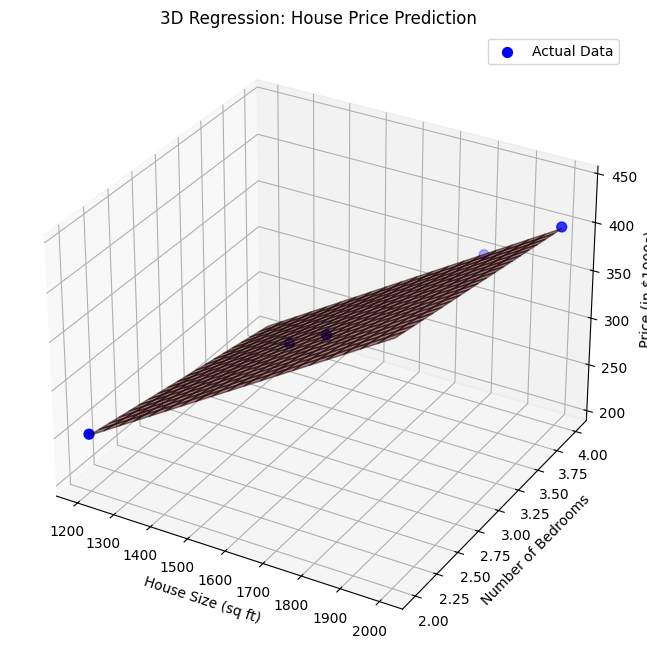

In [ ]:
# Let’s quickly run a linear regression on this small dataset and visualize the result!
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D

# Create the dataset
data = pd.DataFrame({
    "Size": [1500, 1800, 1200, 2000, 1600],
    "Bedrooms": [3, 4, 2, 4, 3],
    "Price": [300, 350, 250, 400, 320]
})

# Prepare the data for regression
X = data[["Size", "Bedrooms"]]
y = data["Price"]

# Fit the model
model = LinearRegression()
model.fit(X, y)

# Get the coefficients
intercept = model.intercept_
coef_size, coef_bedrooms = model.coef_

# Create a 3D plot to visualize the relationship
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of actual data
ax.scatter(data["Size"], data["Bedrooms"], data["Price"], color='blue', s=50, label='Actual Data')

# Create a grid for the regression plane
size_range = np.linspace(1200, 2000, 20)
bedroom_range = np.linspace(2, 4, 20)
size_grid, bedroom_grid = np.meshgrid(size_range, bedroom_range)
price_grid = intercept + coef_size * size_grid + coef_bedrooms * bedroom_grid

# Plot the regression plane
ax.plot_surface(size_grid, bedroom_grid, price_grid, color='red', alpha=0.5, edgecolor='k')

# Labels and legend
ax.set_xlabel('House Size (sq ft)')
ax.set_ylabel('Number of Bedrooms')
ax.set_zlabel('Price (in $1000s)')
ax.set_title('3D Regression: House Price Prediction')
ax.legend()

plt.show()

In [ ]:
import numpy as np

# Actual and predicted values
actual = np.array([3, 5, 7, 9])
predicted = np.array([2.8, 4.9, 7.1, 9.2])

# Calculate the components
mean_actual = np.mean(actual)

# Total Sum of Squares (TSS)
TSS = np.sum((actual - mean_actual) ** 2)

# Residual Sum of Squares (RSS)
RSS = np.sum((actual - predicted) ** 2)

# Explained Sum of Squares (ESS)
ESS = TSS - RSS

# R-squared (Coefficient of Determination)
R_squared = 1 - (RSS / TSS)

# Print results
print(f"Actual values: {actual}")
print(f"Predicted values: {predicted}")
print(f"Mean of actual values: {mean_actual}")
print(f"Total Sum of Squares (TSS): {TSS}")
print(f"Residual Sum of Squares (RSS): {RSS}")
print(f"Explained Sum of Squares (ESS): {ESS}")
print(f"R-squared (R²): {R_squared}")

# Is it a good fit?
if R_squared == 1:
    print("Perfect fit! Model explains all the variance.")
elif R_squared > 0.7:
    print("Strong fit! Model explains most of the variance.")
elif R_squared > 0.5:
    print("Moderate fit. Model explains some variance.")
else:
    print("Weak fit. Model explains little variance.")

# Tum chaho toh hum yeh values change kar ke dekh sakte hain, ya phir scatter plot bhi bana sakte hain! 🚀

Actual values: [3 5 7 9]
Predicted values: [2.8 4.9 7.1 9.2]
Mean of actual values: 6.0
Total Sum of Squares (TSS): 20.0
Residual Sum of Squares (RSS): 0.09999999999999964
Explained Sum of Squares (ESS): 19.9
R-squared (R²): 0.995
Strong fit! Model explains most of the variance.
